In [1]:
import os

import lightning as L
import numpy as np
import torch
from torch import Tensor, nn, optim, utils

os.chdir("/data/1/projects/master_thesis/rnaquanet/src")
from rnaquanet.pipelines.structure_processing.descriptive_columns import *

featuresG = ["atr_" + i for i in ATR_G_COLUMNS] + ["aag_" + i for i in AAG_G_COLUMNS] + ["bon_" + i for i in BON_G_COLUMNS]
featuresG_no = len(featuresG)


featuresA = ["atr_" + i for i in ATR_A_COLUMNS] + ["aag_" + i for i in AAG_A_COLUMNS] + ["bon_" + i for i in BON_A_COLUMNS]
featuresA_no = len(featuresA)


featuresU = ["atr_" + i for i in ATR_U_COLUMNS] + ["aag_" + i for i in AAG_U_COLUMNS] + ["bon_" + i for i in BON_U_COLUMNS]
featuresU_no = len(featuresU)


featuresC = ["atr_" + i for i in ATR_C_COLUMNS] + ["aag_" + i for i in AAG_C_COLUMNS] + ["bon_" + i for i in BON_C_COLUMNS]
featuresC_no = len(featuresC)


features_no = featuresG_no


def normalizeArray(array):
    return (array - array.min()) / (array.max() - array.min())


class GAutoEncoder(L.LightningModule):
    def __init__(self, angles_size=len(ATR_G_COLUMNS + AAG_G_COLUMNS)):
        super().__init__()
        self.angles_size = angles_size
        self.encoder = nn.Sequential(
            nn.Linear(featuresG_no, featuresG_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresG_no // 2, featuresG_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresG_no // 2, featuresG_no // 3),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresG_no // 3, featuresG_no // 3),
            nn.ReLU(),
            nn.Linear(featuresG_no // 3, 7),
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, featuresG_no // 3),
            nn.ReLU(),
            nn.Linear(featuresG_no // 3, featuresG_no // 3),
            nn.ReLU(),
            nn.Linear(featuresG_no // 3, featuresG_no // 2),
            nn.ReLU(),
            nn.Linear(featuresG_no // 2, featuresG_no // 2),
            nn.ReLU(),
            nn.Linear(featuresG_no // 2, featuresG_no),
        )

    def forward(self, x):
        x1 = normalizeArray(x[:, : self.angles_size])
        x2 = normalizeArray(x[:, self.angles_size :])
        x3 = torch.cat((x1, x2), 1)
        x3 = x3.view(x3.size(0), -1)
        x = self.encoder(x3)
        return x

    def training_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)
        # diff = torch.abs(torch.atan2(torch.sin(x_hat - x), torch.cos(x_hat - x)))

        # loss = torch.mean(diff)
        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )

        # Logging to TensorBoard (if installed) by default
        self.log("train_loss", loss)
        return loss

    def validation_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)

        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )

        self.log("val_loss", loss)
        return loss

    def backward(self, loss):
        loss.backward()

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

[01/09/25 01:35:44] INFO     Using                                                                  ]8;id=80851;file:///data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=943587;file:///data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-pa                
                             ckages/kedro/framework/project/rich_logging.yml' as logging                           
                             configuration.                                                                        

In [2]:
class UAutoEncoder(L.LightningModule):
    def __init__(self, angles_size=len(ATR_U_COLUMNS + AAG_U_COLUMNS)):
        super().__init__()
        self.angles_size = angles_size
        self.encoder = nn.Sequential(
            nn.Linear(featuresU_no, featuresU_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresU_no // 2, featuresU_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresU_no // 2, featuresU_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresU_no // 2, 7),
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, featuresU_no // 2),
            nn.ReLU(),
            nn.Linear(featuresU_no // 2, featuresU_no // 2),
            nn.ReLU(),
            nn.Linear(featuresU_no // 2, featuresU_no // 2),
            nn.ReLU(),
            nn.Linear(featuresU_no // 2, featuresU_no),
        )

    def forward(self, x):
        x1 = normalizeArray(x[:, : self.angles_size])
        x2 = normalizeArray(x[:, self.angles_size :])
        x3 = torch.cat((x1, x2), 1)
        x3 = x3.view(x3.size(0), -1)
        x = self.encoder(x3)
        return x

    def training_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)
        # diff = torch.abs(torch.atan2(torch.sin(x_hat - x), torch.cos(x_hat - x)))

        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )

        # Logging to TensorBoard (if installed) by default
        self.log("loss", loss)
        return {"loss": loss}

    def validation_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)
        # diff = torch.abs(torch.atan2(torch.sin(x_hat - x), torch.cos(x_hat - x)))

        # loss = torch.mean(diff)
        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )

        # loss = torch.mean(torch.abs(x_hat - x))
        self.log("val_loss", loss)
        return {"val_loss": loss}

    def backward(self, loss):
        loss.backward()

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [3]:
class CAutoEncoder(L.LightningModule):
    def __init__(self, angles_size=len(ATR_C_COLUMNS + AAG_C_COLUMNS)):
        super().__init__()
        self.angles_size = angles_size
        self.encoder = nn.Sequential(
            nn.Linear(featuresC_no, featuresC_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresC_no // 2, featuresC_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresC_no // 2, featuresC_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresC_no // 2, 7),
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, featuresC_no // 2),
            nn.ReLU(),
            nn.Linear(featuresC_no // 2, featuresC_no // 2),
            nn.ReLU(),
            nn.Linear(featuresC_no // 2, featuresC_no // 2),
            nn.ReLU(),
            nn.Linear(featuresC_no // 2, featuresC_no),
        )

    def forward(self, x):
        x1 = normalizeArray(x[:, : self.angles_size])
        x2 = normalizeArray(x[:, self.angles_size :])
        x3 = torch.cat((x1, x2), 1)
        x3 = x3.view(x3.size(0), -1)
        x = self.encoder(x3)
        return x

    def training_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)
        # diff = torch.abs(torch.atan2(torch.sin(x_hat - x), torch.cos(x_hat - x)))

        # loss = torch.mean(diff)
        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )

        # Logging to TensorBoard (if installed) by default
        self.log("train_loss", loss)
        return {"loss": loss}

    def validation_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)
        # diff = torch.abs(torch.atan2(torch.sin(x_hat - x), torch.cos(x_hat - x)))

        # loss = torch.mean(diff)
        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )
        self.log("val_loss", loss)
        return {"val_loss": loss}

    def backward(self, loss):
        loss.backward()

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [4]:
class AAutoEncoder(L.LightningModule):
    def __init__(self, angles_size=len(ATR_A_COLUMNS + AAG_A_COLUMNS)):
        super().__init__()
        self.angles_size = angles_size
        self.encoder = nn.Sequential(
            nn.Linear(featuresA_no, featuresA_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresA_no // 2, featuresA_no // 2),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresA_no // 2, featuresA_no // 3),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(featuresA_no // 3, featuresA_no // 3),
            nn.ReLU(),
            nn.Linear(featuresA_no // 3, 7),
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, featuresA_no // 3),
            nn.ReLU(),
            nn.Linear(featuresA_no // 3, featuresA_no // 3),
            nn.ReLU(),
            nn.Linear(featuresA_no // 3, featuresA_no // 2),
            nn.ReLU(),
            nn.Linear(featuresA_no // 2, featuresA_no // 2),
            nn.ReLU(),
            nn.Linear(featuresA_no // 2, featuresA_no),
        )

    def forward(self, x):
        x1 = normalizeArray(x[:, : self.angles_size])
        x2 = normalizeArray(x[:, self.angles_size :])
        x3 = torch.cat((x1, x2), 1)
        x3 = x3.view(x3.size(0), -1)
        x = self.encoder(x3)
        return x

    def training_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)
        # diff = torch.abs(torch.atan2(torch.sin(x_hat - x), torch.cos(x_hat - x)))

        # loss = torch.mean(diff)
        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )

        # Logging to TensorBoard (if installed) by default
        self.log("train_loss", loss)
        return loss

    def validation_step(self, x, batch_idx):
        # training_step defines the train loop.
        # it is independent of forward
        # x, _ = batch
        z = self.forward(x)
        x_hat = self.decoder(z)
        # diff = torch.abs(torch.atan2(torch.sin(x_hat - x), torch.cos(x_hat - x)))

        # loss = torch.mean(diff)
        x_b = x[:, self.angles_size :]
        x_a = torch.deg2rad(x[:, : self.angles_size])
        x_hat_b = x_hat[:, self.angles_size :]
        x_hat_a = torch.deg2rad(x_hat[:, : self.angles_size])

        # loss = torch.mean(diff)
        loss = torch.mean(torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a)))) + torch.mean(
            torch.abs(x_hat_b - x_b)
        )
        self.log("val_loss", loss)
        return loss

    def backward(self, loss):
        loss.backward()

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [66]:
print(f"A: {featuresA_no}, G: {featuresG_no}, U: {featuresU_no}, C: {featuresC_no}")

A: 31, G: 34, U: 18, C: 18


In [67]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset


class FeaturesDataset(Dataset):
    def __init__(self, csv_train_path, features, nucleotide):
        self.csv_train = pd.read_csv(csv_train_path)
        self.csv_train = self.csv_train.loc[self.csv_train.nucleotide == nucleotide]
        self.csv_train = self.csv_train[features].dropna()

    def __len__(self):
        return len(self.csv_train)

    def __getitem__(self, idx):
        return torch.tensor(self.csv_train.iloc[idx].values.astype(np.float32)).to(
            torch.float32
        )  # , torch.tensor(self.csv_train.iloc[idx].values.astype(np.float64))

In [76]:
from lightning.pytorch import seed_everything
from lightning.pytorch.callbacks import RichProgressBar
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks.model_checkpoint import ModelCheckpoint
from lightning.pytorch.callbacks.progress.rich_progress import RichProgressBarTheme
from lightning.pytorch.loggers import MLFlowLogger

seed_everything(42)


class MetricTracker(L.Callback):
    def __init__(self):
        self.collection = []

    def on_validation_batch_end(self, trainer, pl_module, outputs, batch, batch_idx):
        vacc = outputs["val_loss"]  # you can access them here
        self.collection.append(vacc)  # track them

    def on_validation_epoch_end(self, trainer, module):
        elogs = trainer.logged_metrics["val_loss"]  # access it here
        self.collection.append(elogs)
        # do whatever is needed


model = "CAutoEncoder"
mlf_logger = MLFlowLogger(
    experiment_name=f"{model}",
    tracking_uri="http://localhost:5000",
    log_model=True,
)
torch.set_float32_matmul_precision("high")
metr = MetricTracker()
if model == "UAutoEncoder":
    autoencoder = UAutoEncoder()
    dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/train_full_dataset.csv",
        featuresU,
        "U",
    )
    val_dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
        featuresU,
        "U",
    )

if model == "GAutoEncoder":
    autoencoder = GAutoEncoder()
    dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/train_full_dataset.csv",
        featuresG,
        "G",
    )
    val_dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
        featuresG,
        "G",
    )
if model == "CAutoEncoder":
    autoencoder = CAutoEncoder()
    dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/train_full_dataset.csv",
        featuresC,
        "C",
    )
    val_dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
        featuresC,
        "C",
    )
if model == "AAutoEncoder":
    autoencoder = AAutoEncoder()
    dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/train_full_dataset.csv",
        featuresA,
        "A",
    )
    val_dataset = FeaturesDataset(
        "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
        featuresA,
        "A",
    )
# create your own theme!
progress_bar = RichProgressBar(
    theme=RichProgressBarTheme(
        metrics_text_delimiter="\n",
        metrics_format=".3e",
    )
)


train_loader = utils.data.DataLoader(dataset, batch_size=1024, shuffle=True)
val_loader = utils.data.DataLoader(val_dataset, batch_size=1024)
trainer = L.Trainer(
    max_epochs=60,
    enable_progress_bar=True,  # callbacks=progress_bar,
    default_root_dir=f"/data/1/projects/master_thesis/rnaquanet/{model}",
    callbacks=[
        EarlyStopping(monitor="val_loss", mode="min", patience=10),
        ModelCheckpoint(monitor="val_loss", save_top_k=1, mode="min"),
    ],
    logger=mlf_logger,
)
trainer.fit(model=autoencoder, train_dataloaders=train_loader, val_dataloaders=val_loader)

Seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Experiment with name CAutoEncoder not found. Creating it.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | encoder | Sequential | 421    | train
1 | decoder | Sequential | 432    | train
-----------------------------------------------
853       Trainable params
0         Non-trainable params
853       Total params
0.003     Total estimated model params size (MB)
19        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

[12/27/24 23:46:43] WARNING  /data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-pac ]8;id=288389;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=256787;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             kages/lightning/pytorch/trainer/connectors/data_connector.py:424: The                 
                             'val_dataloader' does not have many workers which may be a bottleneck.                
                             Consider increasing the value of the `num_workers` argument` to                       
                             `num_workers=23` in the `DataLoader` to improve performance.                          
                                                                                                                   

                    WARNING  /data/1/projects/master_thesis/rnaquanet/.venv/lib/python3.12/site-pac ]8;id=288389;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=256787;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             kages/lightning/pytorch/trainer/connectors/data_connector.py:424: The                 
                             'train_dataloader' does not have many workers which may be a                          
                             bottleneck. Consider increasing the value of the `num_workers`                        
                             argument` to `num_workers=23` in the `DataLoader` to improve                          
                             performance.                                                                          
                                                                                                                   

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

🏃 View run dazzling-eel-932 at: http://localhost:5000/#/experiments/115450503379523509/runs/4a526a81e8414055b74a428ee99d497a
🧪 View experiment at: http://localhost:5000/#/experiments/115450503379523509


In [77]:
modela = AAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/AAutoEncoder/528286060458575507/32418246d9fc498f8da8b6e45cf14ce7/checkpoints/epoch=16-step=2176.ckpt"
)
modela.eval()
script = modela.to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelAAutoEncoder.pt")
modelg = GAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/GAutoEncoder/905870843480108890/2dcd1e81f89d466e8d9f66f903b9af8e/checkpoints/epoch=41-step=7518.ckpt"
)
modelg.eval()
script = modelg.to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelGAutoEncoder.pt")
modelc = CAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/CAutoEncoder/115450503379523509/4a526a81e8414055b74a428ee99d497a/checkpoints/epoch=46-step=7426.ckpt"
)
modelc.eval()
script = modelc.to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelCAutoEncoder.pt")
modelu = UAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/UAutoEncoder/932663713065204480/5394e1f2302c4d29ac266f12500e51eb/checkpoints/epoch=19-step=2340.ckpt"
)
modelu.eval()
script = modelu.to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelUAutoEncoder.pt")

In [5]:
modela = AAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/AAutoEncoder/528286060458575507/32418246d9fc498f8da8b6e45cf14ce7/checkpoints/epoch=16-step=2176.ckpt"
)
modela.eval()
script = modela.to("cpu").to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelAAutoEncoderCPU.pt")
modelg = GAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/GAutoEncoder/905870843480108890/2dcd1e81f89d466e8d9f66f903b9af8e/checkpoints/epoch=41-step=7518.ckpt"
)
modelg.eval()
script = modelg.to("cpu").to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelGAutoEncoderCPU.pt")
modelc = CAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/CAutoEncoder/115450503379523509/4a526a81e8414055b74a428ee99d497a/checkpoints/epoch=46-step=7426.ckpt"
)
modelc.eval()
script = modelc.to("cpu").to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelCAutoEncoderCPU.pt")
modelu = UAutoEncoder.load_from_checkpoint(
    "/data/1/projects/master_thesis/rnaquanet/UAutoEncoder/932663713065204480/5394e1f2302c4d29ac266f12500e51eb/checkpoints/epoch=19-step=2340.ckpt"
)
modelu.eval()
script = modelu.to("cpu").to_torchscript()
torch.jit.save(script, "/data/1/projects/master_thesis/rnaquanet/src/rnaquanet/models/modelUAutoEncoderCPU.pt")

[12/28/24 00:09:05] WARNING  /tmp/ipykernel_2305484/3950990386.py:14: UserWarning: To copy          ]8;id=671088;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=721590;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             construct from a tensor, it is recommended to use                                     
                             sourceTensor.clone().detach() or                                                      
                             sourceTensor.clone().detach().requires_grad_(True), rather than                       
                             torch.tensor(sourceTensor).                                                           
                               x_hat = model.decoder(model.forward(torch.tensor(t).cuda())).cpu()                  
                                                                                                                   

<BarContainer object of 14 artists>

<BarContainer object of 4 artists>

[12/28/24 00:09:07] WARNING  /tmp/ipykernel_2305484/3950990386.py:14: UserWarning: To copy          ]8;id=883794;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=805635;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             construct from a tensor, it is recommended to use                                     
                             sourceTensor.clone().detach() or                                                      
                             sourceTensor.clone().detach().requires_grad_(True), rather than                       
                             torch.tensor(sourceTensor).                                                           
                               x_hat = model.decoder(model.forward(torch.tensor(t).cuda())).cpu()                  
                                                                                                                   

<BarContainer object of 26 artists>

<BarContainer object of 8 artists>

[12/28/24 00:09:09] WARNING  /tmp/ipykernel_2305484/3950990386.py:14: UserWarning: To copy          ]8;id=33659;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=844151;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             construct from a tensor, it is recommended to use                                     
                             sourceTensor.clone().detach() or                                                      
                             sourceTensor.clone().detach().requires_grad_(True), rather than                       
                             torch.tensor(sourceTensor).                                                           
                               x_hat = model.decoder(model.forward(torch.tensor(t).cuda())).cpu()                  
                                                                                                                   

<BarContainer object of 14 artists>

<BarContainer object of 4 artists>

[12/28/24 00:09:11] WARNING  /tmp/ipykernel_2305484/3950990386.py:14: UserWarning: To copy          ]8;id=221231;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=957492;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             construct from a tensor, it is recommended to use                                     
                             sourceTensor.clone().detach() or                                                      
                             sourceTensor.clone().detach().requires_grad_(True), rather than                       
                             torch.tensor(sourceTensor).                                                           
                               x_hat = model.decoder(model.forward(torch.tensor(t).cuda())).cpu()                  
                                                                                                                   

<BarContainer object of 24 artists>

<BarContainer object of 7 artists>

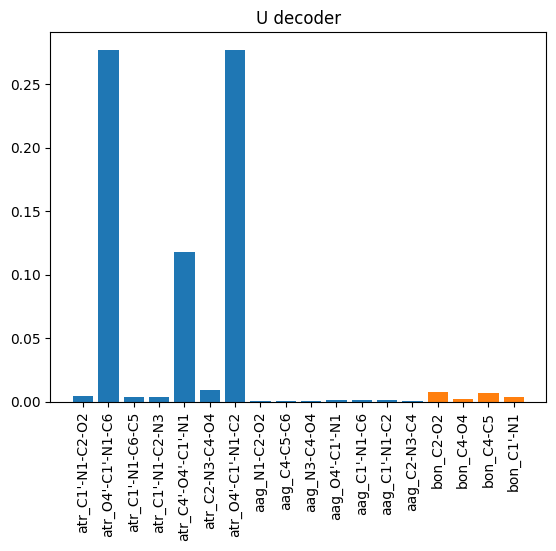

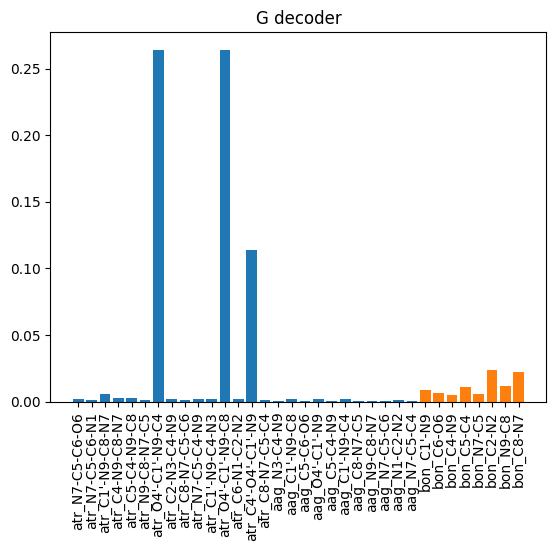

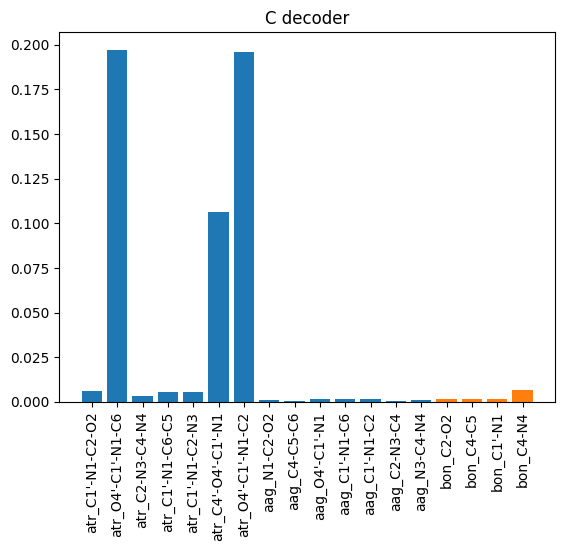

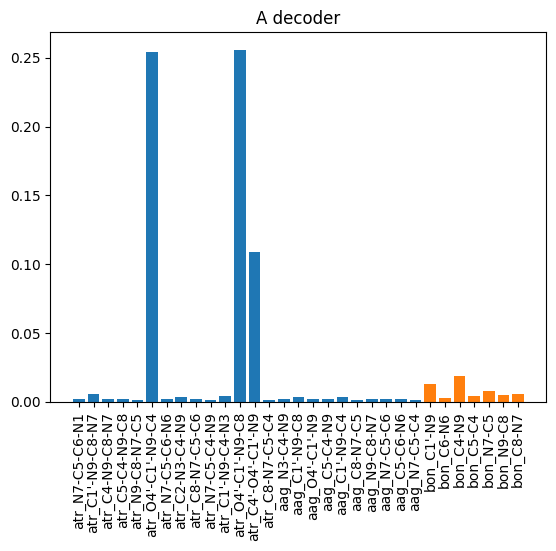

In [88]:
import matplotlib.pyplot as plt


def check_difference(model, val_dataset, features, angle_size, nuc):
    fig, ax = plt.subplots()
    r = []
    for batch in np.array_split(
        val_dataset[:],
        indices_or_sections=val_dataset.shape[0] // min(1024, val_dataset.shape[0]),
        axis=0,
    ):
        t = torch.tensor(batch[:][0]).unsqueeze(0)
        x_hat = model.decoder(model.forward(torch.tensor(t).cuda())).cpu()
        x_b = torch.tensor(batch[:][0]).unsqueeze(0)[:, angle_size:]
        x_a = torch.deg2rad(torch.tensor(batch[:][0]).unsqueeze(0)[:, :angle_size])
        x_hat_b = x_hat[:, angle_size:]
        x_hat_a = torch.deg2rad(x_hat[:, :angle_size])
        r.append(
            torch.cat(
                (torch.abs(torch.atan2(torch.sin(x_hat_a - x_a), torch.cos(x_hat_a - x_a))), torch.abs(x_hat_b - x_b)), dim=1
            )
        )
        # loss = torch.mean(diff)

    r = np.sum(torch.cat(r, dim=0).detach().numpy(), axis=0) / len(r)
    plt.xticks(rotation=90)
    ax.set_title(f"{nuc} decoder")
    display(
        ax.bar(
            features[:angle_size],
            (r[:angle_size]),
        )
    )
    display(
        ax.bar(
            features[angle_size:],
            (r[angle_size:]),
        )
    )


check_difference(
    UAutoEncoder.load_from_checkpoint(
        "/data/1/projects/master_thesis/rnaquanet/UAutoEncoder/932663713065204480/5394e1f2302c4d29ac266f12500e51eb/checkpoints/epoch=19-step=2340.ckpt"
    ).cuda(),
    np.array(
        FeaturesDataset(
            "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
            featuresU,
            "U",
        )
    ),
    featuresU,
    len(ATR_U_COLUMNS + AAG_U_COLUMNS),
    "U",
)
check_difference(
    GAutoEncoder.load_from_checkpoint(
        "/data/1/projects/master_thesis/rnaquanet/GAutoEncoder/905870843480108890/2dcd1e81f89d466e8d9f66f903b9af8e/checkpoints/epoch=41-step=7518.ckpt"
    ).cuda(),
    np.array(
        FeaturesDataset(
            "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
            featuresG,
            "G",
        )
    ),
    featuresG,
    len(ATR_G_COLUMNS + AAG_G_COLUMNS),
    "G",
)
check_difference(
    CAutoEncoder.load_from_checkpoint(
        "/data/1/projects/master_thesis/rnaquanet/CAutoEncoder/115450503379523509/4a526a81e8414055b74a428ee99d497a/checkpoints/epoch=46-step=7426.ckpt"
    ).cuda(),
    np.array(
        FeaturesDataset(
            "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
            featuresC,
            "C",
        )
    ),
    featuresC,
    len(ATR_C_COLUMNS + AAG_C_COLUMNS),
    "C",
)
check_difference(
    AAutoEncoder.load_from_checkpoint(
        "/data/1/projects/master_thesis/rnaquanet/AAutoEncoder/528286060458575507/32418246d9fc498f8da8b6e45cf14ce7/checkpoints/epoch=16-step=2176.ckpt"
    ).cuda(),
    np.array(
        FeaturesDataset(
            "/data/1/projects/master_thesis/rnaquanet/data/04_feature/rnaquanet_structures/val_full_dataset.csv",
            featuresA,
            "A",
        )
    ),
    featuresA,
    len(ATR_A_COLUMNS + AAG_A_COLUMNS),
    "A",
)

In [ ]:
import pandas as pd

COMMON_COLUMNS = (
    ["atr_" + i for i in ATR_COMMON_COLUMNS]
    + ["bon_" + i for i in BON_COMMON_COLUMNS]
    + ["aag_" + i for i in AAG_COMMON_COLUMNS]
)


def compress_adeine_features(df: pd.DataFrame) -> pd.DataFrame:
    featuresA = ["atr_" + i for i in ATR_A_COLUMNS] + ["aag_" + i for i in AAG_A_COLUMNS] + ["bon_" + i for i in BON_A_COLUMNS]
    adeine_compressor = torch.jit.load("/data/1/projects/master_thesis/rnaquanet/src/models/modelAAutoEncoder.pt")
    results_common = []
    results_features = []
    for description_name, group in df.groupby("description"):
        group = group.loc[group.nucleotide == "A"]
        a = group.loc[:, featuresA + COMMON_COLUMNS].replace("-", np.nan).astype(float)
        a = a.ffill()
        a = a.bfill()
        results_common.append(
            pd.concat(
                [
                    a.loc[:, COMMON_COLUMNS],
                    group.loc[:, ~group.columns.isin(featuresA + COMMON_COLUMNS)],
                    pd.DataFrame([description_name] * group.shape[0]),
                ],
                axis=1,
            )
        )
        results_features.extend(a.loc[:, featuresA].values)
    other_col = list((set(df.columns) - set(featuresA)) - set(COMMON_COLUMNS))
    df = pd.DataFrame(
        pd.concat(results_common, axis=0),
        columns=COMMON_COLUMNS + other_col + ["description"],
    )
    compressed_features = []
    results_features = np.array(results_features)
    for batch in np.array_split(results_features, indices_or_sections=results_features.shape[0] // 1024, axis=0):
        compressed_features.append(
            np.asarray(adeine_compressor(torch.Tensor(batch).to("cuda")).cpu().detach().numpy()),
        )
    compressed_features = np.concatenate(compressed_features, axis=0)
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                compressed_features,
                columns=["ds1", "ds2", "ds3", "ds4", "ds5", "ds6", "ds7"],
            ),
        ],
        axis=1,
    )
    return df

In [ ]:
df = pd.read_csv("/data/1/projects/master_thesis/rnaquanet/data/03_primary/rnaquanet_structures/val_processed.csv")
featuresA = ["atr_" + i for i in ATR_A_COLUMNS] + ["aag_" + i for i in AAG_A_COLUMNS] + ["bon_" + i for i in BON_A_COLUMNS]
featuresU = ["atr_" + i for i in ATR_U_COLUMNS] + ["aag_" + i for i in AAG_U_COLUMNS] + ["bon_" + i for i in BON_U_COLUMNS]
featuresG = ["atr_" + i for i in ATR_G_COLUMNS] + ["aag_" + i for i in AAG_G_COLUMNS] + ["bon_" + i for i in BON_G_COLUMNS]
featuresC = ["atr_" + i for i in ATR_C_COLUMNS] + ["aag_" + i for i in AAG_C_COLUMNS] + ["bon_" + i for i in BON_C_COLUMNS]
adeine_compressor = torch.jit.load("/data/1/projects/master_thesis/rnaquanet/src/models/modelAAutoEncoder.pt")
results_common = []
results_features = []
for description_name, group in df.groupby("description"):
    group = group.loc[group.nucleotide == "A"]
    a = group.loc[:, featuresA + COMMON_COLUMNS].replace("-", np.nan).astype(float)
    a = a.ffill()
    a = a.bfill()
    results_common.append(
        pd.concat(
            [
                a.loc[:, COMMON_COLUMNS],
                group.loc[:, ~group.columns.isin(featuresA + COMMON_COLUMNS)],
            ],
            axis=1,
        )
    )
    results_features.extend(a.loc[:, featuresA].values)
other_col = list((set(df.columns) - set(featuresA) - set(featuresC) - set(featuresG) - set(featuresU)) - set(COMMON_COLUMNS))
df = pd.DataFrame(
    pd.concat(results_common, axis=0),
    columns=COMMON_COLUMNS + other_col,
)
compressed_features = []
results_features = np.array(results_features)
for batch in np.array_split(results_features, indices_or_sections=results_features.shape[0] // 1024, axis=0):
    compressed_features.append(
        np.asarray(adeine_compressor(torch.Tensor(batch).to("cuda")).cpu().detach().numpy()),
    )
r = pd.concat(
    [
        df,
        pd.DataFrame(
            np.concatenate(compressed_features, axis=0),
            columns=["ds1", "ds2", "ds3", "ds4", "ds5", "ds6", "ds7"],
        ).set_index(df.index),
    ],
    axis=1,
)

In [16]:
pd.set_option("display.max_columns", 500)

In [95]:
r.set_index(["description", "residue_no"])

atr_C6-N1-C2-N2  atr_O3'-P-O5'-C5'  \
description  residue_no                                       
1DQF_1_BA_10 4                     0.004            -30.101   
             11                    0.094            -26.840   
1DQF_1_BA_11 4                    -0.106            -29.708   
             11                   -0.021            -30.966   
1DQF_1_BA_13 4                    -0.079            -29.710   
...                                  ...                ...   
8SP9_1_C_9   82                   -0.010            -21.895   
             101                  -0.024            -21.998   
             112                   0.070            -31.472   
             119                  -0.117            -30.671   
             120                   0.029             29.924   

                         atr_C3'-C4'-O4'-C1'  atr_O4'-C1'-C2'-C3'  \
description  residue_no                                             
1DQF_1_BA_10 4                       166.412               86.704   
             11                      -32.328               90.425   
1DQF_1_BA_11 4                       157.324               87.388   
             11                      176.658               86.130   
1DQF_1_BA_13 4                       170.105               87.372   
...                                      ...                  ...   
8SP9_1_C_9   82                      172.033               95.208   
             101                    -174.913               95.211   
             112                     175.326               85.938   
             119                    -176.824               86.588   
             120                    -178.991              147.103   

                         atr_C5-C4-N9-C8  atr_C1'-N9-C8-N7  \
description  residue_no                                      
1DQF_1_BA_10 4                    -0.001           -35.101   
             11                   -0.221           -31.656   
1DQF_1_BA_11 4                     0.128           -36.148   
             11                    0.035           -32.933   
1DQF_1_BA_13 4                     0.056           -34.459   
...                                  ...               ...   
8SP9_1_C_9   82                    0.024           -39.228   
             101                  -0.052           -37.688   
             112                  -0.221           -32.596   
             119                   0.113           -32.580   
             120                  -0.093            27.595   

                         atr_O5'-C5'-C4'-O4'  atr_C8-N7-C5-C6  \
description  residue_no                                         
1DQF_1_BA_10 4                      -171.700            0.018   
             11                      175.684            0.126   
1DQF_1_BA_11 4                      -177.039           -0.007   
             11                      163.014           -0.018   
1DQF_1_BA_13 4                       175.641            0.055   
...                                      ...              ...   
8SP9_1_C_9   82                      164.239            0.009   
             101                     142.499            0.076   
             112                    -161.691            0.045   
             119                     170.105            0.050   
             120                    -134.348            0.007   

                         atr_N1-C2-N3-C4  atr_C4-N9-C8-N7  atr_C2-N3-C4-O4  \
description  residue_no                                                      
1DQF_1_BA_10 4                     0.052         -155.069           16.753   
             11                    0.111         -151.076           15.337   
1DQF_1_BA_11 4                    -0.068         -156.043           18.056   
             11                   -0.033         -152.642           13.947   
1DQF_1_BA_13 4                     0.002         -154.432           16.322   
...                                  ...              ...              ...   
8SP9_1_C_9   82               

In [70]:
results_features = np.array(results_features)

In [59]:
df = pd.read_csv("/data/1/projects/master_thesis/rnaquanet/data/03_primary/rnaquanet_structures/val_processed.csv")

In [61]:
df

,nucleotide,pairings_with,bp_t_cWW,bp_t_cWH,bp_t_cWS,bp_t_cHW,bp_t_cHH,bp_t_cHS,bp_t_cSW,bp_t_cSH,bp_t_cSS,bp_t_tWW,bp_t_tWH,bp_t_tWS,bp_t_tHW,bp_t_tHH,bp_t_tHS,bp_t_tSW,bp_t_tSH,bp_t_tSS,bp_b_.,bp_b_{},bp_b_(),bp_b_[],bp_b_<>,residue,description,residue_no,bon_C1'-C2',bon_C1'-N1,bon_C1'-N9,bon_C2'-O2',bon_C2-N2,bon_C2-N3,bon_C2-O2,bon_C3'-C2',bon_C3'-O3',bon_C4'-C3',bon_C4'-O4',bon_C4-C5,bon_C4-N4,bon_C4-N9,bon_C4-O4,bon_C5'-C4',bon_C5-C4,bon_C5-C6,bon_C6-N1,bon_C6-N6,bon_C6-O6,bon_C8-N7,bon_N1-C2,bon_N3-C4,bon_N7-C5,bon_N9-C8,bon_O3'-P,bon_O4'-C1',bon_O5'-C5',bon_OP1-P,bon_OP2-P,bon_P-O5',ang_P,ang_OP1,ang_OP2,ang_O5',ang_C5',ang_C4',ang_C3',ang_O3',atr_C1'-C2'-C3'-C4',atr_C1'-N1-C2-N3,atr_C1'-N1-C2-O2,atr_C1'-N1-C6-C5,atr_C1'-N9-C4-N3,atr_C1'-N9-C8-N7,atr_C2'-C3'-C4'-O4',atr_C2-N3-C4-C5,atr_C2-N3-C4-N4,atr_C2-N3-C4-N9,atr_C2-N3-C4-O4,atr_C3'-C4'-O4'-C1',atr_C3'-O3'-P-OP1,atr_C3'-O3'-P-OP2,atr_C3'-O3'-P-O5',atr_C4'-C3'-O3'-P,atr_C4'-O4'-C1'-C2',atr_C4'-O4'-C1'-N1,atr_C4'-O4'-C1'-N9,atr_C4-C5-C6-N1,atr_C4-N9-C8-N7,atr_C5'-C4'-C3'-C2',atr_C5'-C4'-C3'-O3',atr_C5'-C4'-O4'-C1',atr_C5-C4-N9-C8,atr_C5-C6-N1-C2,atr_C6-N1-C2-N2,atr_C6-N1-C2-N3,atr_C8-N7-C5-C4,atr_C8-N7-C5-C6,atr_N1-C2-N3-C4,atr_N3-C4-C5-C6,atr_N7-C5-C4-N9,atr_N7-C5-C6-N1,atr_N7-C5-C6-N6,atr_N7-C5-C6-O6,atr_N9-C8-N7-C5,atr_O3'-P-O5'-C5',atr_O4'-C1'-C2'-C3',atr_O4'-C1'-C2'-O2',atr_O4'-C1'-N1-C2,atr_O4'-C1'-N1-C6,atr_O4'-C1'-N9-C4,atr_O4'-C1'-N9-C8,atr_O5'-C5'-C4'-C3',atr_O5'-C5'-C4'-O4',atr_P-O5'-C5'-C4',aag_C1'-C2'-C3',aag_C1'-C2'-O2',aag_C1'-N1-C2,aag_C1'-N1-C6,aag_C1'-N9-C4,aag_C1'-N9-C8,aag_C2'-C3'-C4',aag_C2-N3-C4,aag_C3'-O3'-P,aag_C4'-C3'-O3',aag_C4'-O4'-C1',aag_C4-C5-C6,aag_C5'-C4'-C3',aag_C5'-C4'-O4',aag_C5-C4-N9,aag_C5-C6-N1,aag_C5-C6-N6,aag_C5-C6-O6,aag_C6-N1-C2,aag_C8-N7-C5,aag_N1-C2-N2,aag_N1-C2-N3,aag_N1-C2-O2,aag_N3-C4-C5,aag_N3-C4-N4,aag_N3-C4-N9,aag_N3-C4-O4,aag_N7-C5-C4,aag_N7-C5-C6,aag_N9-C8-N7,aag_O3'-P-O5',aag_O3'-P-OP1,aag_O3'-P-OP2,aag_O4'-C1'-C2',aag_O4'-C1'-N1,aag_O4'-C1'-N9,aag_O5'-C5'-C4',aag_P-O5'-C5'
0,G,86.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,A.G1,3RG5_1_B_18,1,NaN,1.460,1.415,1.335,1.321,NaN,1.523,1.424,1.525,1.457,NaN,NaN,1.373,NaN,1.512,1.380,1.418,1.390,NaN,1.237,1.304,1.370,1.349,1.389,1.374,1.609,1.415,1.430,1.465,1.483,1.631,NaN,NaN,NaN,NaN,120.858,110.988,115.210,111.542,NaN,NaN,NaN,NaN,179.980,-179.724,-29.684,-0.026,NaN,179.943,NaN,8.854,NaN,NaN,-58.762,-150.238,15.848,NaN,-107.254,-0.048,0.187,-149.457,89.936,132.800,-0.203,-0.018,-179.837,0.073,-0.053,-179.983,-0.048,0.077,0.163,179.878,NaN,-0.077,-0.083,NaN,-33.647,83.437,NaN,NaN,-163.853,16.041,100.030,-17.724,170.929,NaN,108.795,NaN,NaN,126.563,127.110,102.641,NaN,NaN,111.542,109.770,NaN,115.210,108.796,105.420,111.521,NaN,128.691,125.097,104.244,116.115,124.121,NaN,128.549,NaN,126.032,NaN,110.739,130.423,113.270,NaN,NaN,NaN,106.660,NaN,108.402,110.988,120.858,NaN
1,C,85.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,A.C2,3RG5_1_B_18,2,1.472,NaN,1.416,NaN,1.352,1.239,1.524,1.426,1.521,1.452,1.425,1.332,NaN,NaN,1.512,NaN,1.339,1.367,NaN,NaN,NaN,1.399,1.334,NaN,NaN,1.609,1.418,1.427,1.485,1.484,1.593,NaN,107.377,108.226,103.977,121.011,110.298,115.556,111.512,NaN,-179.860,0.106,179.985,NaN,NaN,-36.589,0.117,-179.825,NaN,NaN,21.237,-173.440,56.094,-83.936,-148.911,2.910,-120.236,NaN,-0.121,NaN,-156.317,82.993,145.165,NaN,0.113,NaN,0.014,NaN,NaN,-0.126,0.008,NaN,NaN,NaN,NaN,NaN,-64.754,-25.532,91.681,-156.411,23.716,NaN,NaN,45.378,-71.463,-178.447,NaN,108.627,118.891,120.828,NaN,NaN,102.264,119.953,119.795,111.512,109.649,117.365,115.556,109.232,NaN,121.134,NaN,NaN,120.281,NaN,NaN,119.235,119.126,122.033,117.781,NaN,NaN,NaN,NaN,NaN,103.977,107.377,108.226,107.591,108.440,NaN,110.298,121.011,NaN
2,C,84.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,A.C3,3RG5_1_B_18,3,1.474,NaN,1.416,NaN,1.352,1.238,1.524,1.427,1.522,1.453,1.425,1.33

In [93]:
pd.read_csv(
    "/data/1/projects/master_thesis/rnaquanet/data/02_intermediate/rnaquanet_structures/train/438D_1_AB_17/438D_1_AB_17.bon",
    delim_whitespace=True,
)

[12/22/24 22:23:51] WARNING  /tmp/ipykernel_6477/2224194729.py:1: FutureWarning: The                ]8;id=602516;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=161348;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             'delim_whitespace' keyword in pd.read_csv is deprecated and will be                   
                             removed in a future version. Use ``sep='\s+'`` instead                                
                               pd.read_csv('/data/1/projects/master_thesis/rnaquanet/data/02_interm                
                             ediate/rnaquanet_structures/train/438D_1_AB_17/438D_1_AB_17.bon',delim                
                             _whitespace=True)                                                                     
                                                                                                                   

,Chain,ResNum,iCode,Name,C1'-C2',C1'-N1,C1'-N9,C2'-O2',C2-N2,C2-N3,C2-O2,C3'-C2',C3'-O3',C4'-C3',C4'-O4',C4-C5,C4-N4,C4-N9,C4-O4,C5'-C4',C5-C4,C5-C6,C6-N1,C6-N6,C6-O6,C8-N7,N1-C2,N3-C4,N7-C5,N9-C8,O3'-P,O4'-C1',O5'-C5',OP1-P,OP2-P,P-O5'
0,A,1,-,G,1.528,-,1.460,1.416,1.335,1.321,-,1.524,1.425,1.522,1.455,-,-,1.374,-,1.510,1.380,1.419,1.389,-,1.237,1.305,1.371,1.349,1.389,1.373,1.610,1.416,1.431,1.465,1.483,1.631
1,A,2,-,G,1.528,-,1.460,1.416,1.336,1.321,-,1.524,1.425,1.522,1.455,-,-,1.374,-,1.511,1.379,1.419,1.391,-,1.236,1.305,1.371,1.349,1.389,1.373,1.608,1.417,1.428,1.485,1.484,1.593
2,A,3,-,G,1.529,-,1.459,1.416,1.335,1.319,-,1.524,1.425,1.522,1.453,-,-,1.375,-,1.511,1.379,1.420,1.389,-,1.236,1.305,1.371,1.349,1.390,1.374,1.608,1.417,1.426,1.485,1.486,1.593
3,A,4,-,C,1.530,1.472,-,1.415,-,1.352,1.239,1.524,1.425,1.521,1.453,1.425,1.332,-,-,1.511,-,1.340,1.368,-,-,-,1.397,1.334,-,-,1.609,1.418,1.426,1.484,1.485,1.594
4,A,5,-,G,1.529,-,1.461,1.415,1.336,1.320,-,1.524,1.425,1.522,1.453,-,-,1.374,-,1.510,1.380,1.421,1.390,-,1.237,1.305,1.370,1.348,1.389,1.373,1.608,1.417,1.426,1.485,1.485,1.593
5,A,6,-,C,1.526,1.473,-,1.416,-,1.351,1.241,1.525,1.425,1.525,1.458,1.425,1.331,-,-,1.513,-,1.338,1.368,-,-,-,1.397,1.334,-,-,1.610,1.414,1.427,1.484,1.485,1.594
6,A,7,-,U,1.532,1.469,-,1.416,-,1.370,1.216,1.526,1.426,1.521,1.448,1.429,-,-,1.230,1.513,-,1.336,1.375,-,-,-,1.381,1.375,-,-,1.610,1.414,1.429,1.485,1.484,1.595
7,A,8,-,C,1.530,1.472,-,1.416,-,1.353,1.240,1.539,1.433,1.532,1.443,1.425,1.334,-,-,1.513,-,1.339,1.366,-,-,-,1.398,1.333,-,-,1.612,1.401,1.429,1.487,1.485,1.594
8,A,9,-,C,1.528,1.475,-,1.415,-,1.353,1.239,1.524,1.426,1.522,1.454,1.426,1.332,-,-,1.511,-,1.339,1.367,-,-,-,1.398,1.333,-,-,1.608,1.417,1.427,1.487,1.483,1.595
9,A,10,-,G,1.525,-,1.460,1.415,1.336,1.320,-,1.524,1.426,1.529,1.457,-,-,1.376,-,1.511,1.379,1.420,1.390,-,1.236,1.305,1.371,1.349,1.390,1.373,1.610,1.411,1.427,1.485,1.485,1.593


In [91]:
pd.read_csv(
    "/data/1/projects/master_thesis/rnaquanet/data/02_intermediate/rnaquanet_structures/train/438D_1_AB_17/438D_1_AB_17.atr",
    delim_whitespace=True,
)

[12/22/24 22:22:38] WARNING  /tmp/ipykernel_6477/1670222778.py:1: FutureWarning: The                ]8;id=917000;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=543324;file:///usr/lib/python3.12/warnings.py#112\112]8;;\
                             'delim_whitespace' keyword in pd.read_csv is deprecated and will be                   
                             removed in a future version. Use ``sep='\s+'`` instead                                
                               pd.read_csv('/data/1/projects/master_thesis/rnaquanet/data/02_interm                
                             ediate/rnaquanet_structures/train/438D_1_AB_17/438D_1_AB_17.atr',delim                
                             _whitespace=True)                                                                     
                                                                                                                   

,Chain,ResNum,iCode,Name,C1'-C2'-C3'-C4',C1'-N1-C2-N3,C1'-N1-C2-O2,C1'-N1-C6-C5,C1'-N9-C4-N3,C1'-N9-C8-N7,C2'-C3'-C4'-O4',C2-N3-C4-C5,C2-N3-C4-N4,C2-N3-C4-N9,C2-N3-C4-O4,C3'-C4'-O4'-C1',C3'-O3'-P-OP1,C3'-O3'-P-OP2,C3'-O3'-P-O5',C4'-C3'-O3'-P,C4'-O4'-C1'-C2',C4'-O4'-C1'-N1,C4'-O4'-C1'-N9,C4-C5-C6-N1,C4-N9-C8-N7,C5'-C4'-C3'-C2',C5'-C4'-C3'-O3',C5'-C4'-O4'-C1',C5-C4-N9-C8,C5-C6-N1-C2,C6-N1-C2-N2,C6-N1-C2-N3,C8-N7-C5-C4,C8-N7-C5-C6,N1-C2-N3-C4,N3-C4-C5-C6,N7-C5-C4-N9,N7-C5-C6-N1,N7-C5-C6-N6,N7-C5-C6-O6,N9-C8-N7-C5,O3'-P-O5'-C5',O4'-C1'-C2'-C3',O4'-C1'-C2'-O2',O4'-C1'-N1-C2,O4'-C1'-N1-C6,O4'-C1'-N9-C4,O4'-C1'-N9-C8,O5'-C5'-C4'-C3',O5'-C5'-C4'-O4',P-O5'-C5'-C4'
0,A,1,-,G,37.564,-,-,-,-179.872,-179.647,-32.432,-0.083,-,179.869,-,13.710,-,-,-64.892,-155.381,10.828,-,-112.463,0.013,0.153,-152.075,87.260,137.552,-0.155,-0.119,-179.798,0.137,-0.026,179.956,-0.029,0.092,0.116,-179.967,-,0.037,-0.079,-,-30.517,86.461,-,-,-175.819,3.942,-81.562,160.999,170.929
1,A,2,-,G,37.803,-,-,-,179.834,179.879,-34.997,0.052,-,-179.960,-,17.846,-179.483,50.280,-69.652,-152.212,6.769,-,-116.393,0.006,0.032,-154.757,84.573,141.799,-0.030,0.051,179.908,-0.065,0.000,-179.918,0.011,-0.062,0.019,179.919,-,-0.060,-0.020,-64.617,-28.234,88.753,-,-,-159.110,21.073,40.345,-76.784,-164.298
2,A,3,-,G,37.412,-,-,-,179.972,-179.864,-35.609,-0.040,-,179.949,-,19.308,176.089,45.502,-69.669,-151.245,5.044,-,-118.231,0.062,0.106,-155.315,83.998,143.145,-0.102,-0.061,-179.985,0.007,-0.009,-179.919,0.044,-0.015,0.071,179.967,-,-0.010,-0.060,-60.246,-26.970,90.061,-,-,-159.441,20.523,52.753,-64.259,174.347
3,A,4,-,C,37.158,-179.882,0.098,-179.931,-,-,-36.634,0.226,-179.665,-,-,21.358,175.925,45.275,-77.964,-157.469,2.761,-120.570,-,-0.115,-,-156.236,83.083,145.206,-,0.085,-,0.103,-,-,-0.254,-0.039,-,-,-,-,-,-63.093,-25.427,91.727,-152.210,27.805,-,-,47.042,-69.705,177.861
4,A,5,-,G,37.253,-,-,-,179.884,179.545,-35.378,0.025,-,-179.769,-,19.074,167.624,37.025,-54.917,-151.513,5.179,-,-117.975,-0.043,-0.265,-154.949,84.357,142.960,0.287,0.159,179.865,-0.200,0.074,-179.938,0.093,-0.048,-0.230,179.970,-,-0.034,0.119,-60.203,-26.952,90.131,-,-,-142.775,37.452,42.205,-74.798,-169.414
5,A,6,-,C,36.976,-179.605,0.388,179.784,-,-,-27.981,0.164,-179.779,-,-,6.800,-169.653,59.954,10.016,-168.839,17.452,-105.698,-,-0.101,-,-147.740,91.535,130.633,-,0.007,-,0.176,-,-,-0.258,0.018,-,-,-,-,-,-155.860,-34.128,83.288,-173.936,6.283,-,-,134.183,16.286,145.357
6,A,7,-,U,32.747,179.683,-0.818,179.549,-,-,-37.220,-0.437,-,-,178.898,27.201,124.296,-105.667,-115.921,-160.867,-6.055,-129.688,-,0.629,-,-156.552,83.196,151.176,-,-0.058,-,-0.693,-,-,0.967,-0.392,-,-,-,-,-,-120.346,-17.385,100.196,-130.003,50.376,-,-,30.948,-85.438,-114.629
7,A,8,-,C,-10.890,179.155,-0.906,-179.221,-,-,-7.964,0.386,-179.451,-,-,26.141,-1.847,128.745,155.202,44.395,-33.809,-157.029,-,-0.013,-,-127.436,109.877,150.295,-,0.526,-,-0.596,-,-,0.139,-0.454,-,-,-,-,-,148.200,26.954,144.801,-123.212,56.538,-,-,26.900,-91.411,-170.946
8,A,9,-,C,-36.637,-179.814,0.302,179.814,-,-,32.953,0.009,-179.890,-,-,-15.650,-90.829,40.268,142.653,-86.311,-8.266,-131.795,-,0.074,-,-86.599,152.984,107.908,-,-0.145,-,0.145,-,-,-0.078,-0.006,-,-,-,-,-,109.464,28.417,145.396,-161.996,18.045,-,-,-170.802,71.901,-125.156
9,A,10,-,G,-36.422,-,-,-,-179.597,-178.905,24.244,0.015,-,179.717,-,-0.998,-103.110,27.257,-144.095,-150.115,-22.960,-,-146.684,-0.237,0.514,-95.361,144.005,123.049,-0.533,0.109,-179.897,0.106,-0.105,179.849,-0.165,0.198,0.408,179.813,-,-0.491,-0.254,-164.256,37.142,154.751,-,-,123.611,-57.086,31.131,-87.015,164.516
